# Adding a service demand

In this section, we will detail how to add a service demand to MUSE. 

A service demand is an end-use demand. For example, in the residential sector, a service demand could be cooking. Houses require energy to cook food and a technology to service this demand, such as an electric stove. 

This process consists of setting a demand, either through inputs derived from the user or correlations of GDP and population which reflect the socio-economic decvelopment of a region or country. In addition, a technology must be added to service the demand.

## Addition of cooking demand

Firstly, we must add the demand section. In this example, we will add a cooking preset demand. To achieve this, we will now edit the `Residential2020Consumption.csv` and `Residential2050Consumption.csv` files, found within the `technodata/preset/` directory.

The `Residential2020Consumption.csv` file allows us to specify the demand in 2020 for each region and technology per timeslice. The `Residential2050Consumption.csv` file does the same but for the year 2050. The datapoints between these are interpolated.

Firstly, we must add the new service demand: `cook` as a column in these two files. Next, we add the demand. Again, the modified entries are in bold:

||RegionName|ProcessName|Timeslice|electricity|gas|heat|CO2f|wind|**cook**|
|-|-|-|-|-|-|-|-|-|-|
|0|R1|gasboiler|1|0|0|1|0|0|**0**|
|...|...|...|...|...|...|...|...|...|**...**|
|15|R2|gasboiler|8|0|0|2|0|0|**0**|
|**16**|**R1**|**electric_stove**|**1**|**0**|**0**|**0**|**0**|**0**|**1**|
|**17**|**R1**|**electric_stove**|**2**|**0**|**0**|**0**|**0**|**0**|**2**|
|**18**|**R1**|**electric_stove**|**3**|**0**|**0**|**0**|**0**|**0**|**1**|
|**19**|**R1**|**electric_stove**|**4**|**0**|**0**|**0**|**0**|**0**|**1.5**|
|**20**|**R1**|**electric_stove**|**5**|**0**|**0**|**0**|**0**|**0**|**2**|
|**21**|**R1**|**electric_stove**|**6**|**0**|**0**|**0**|**0**|**0**|**3**|
|**22**|**R1**|**electric_stove**|**7**|**0**|**0**|**0**|**0**|**0**|**2**|
|**23**|**R1**|**electric_stove**|**8**|**0**|**0**|**0**|**0**|**0**|**3**|
|**24**|**R2**|**electric_stove**|**1**|**0**|**0**|**0**|**0**|**0**|**1**|
|**25**|**R2**|**electric_stove**|**2**|**0**|**0**|**0**|**0**|**0**|**1**|
|**26**|**R2**|**electric_stove**|**3**|**0**|**0**|**0**|**0**|**0**|**1**|
|**27**|**R2**|**electric_stove**|**4**|**0**|**0**|**0**|**0**|**0**|**1.5**|
|**28**|**R2**|**electric_stove**|**5**|**0**|**0**|**0**|**0**|**0**|**2**|
|**29**|**R2**|**electric_stove**|**6**|**0**|**0**|**0**|**0**|**0**|**2**|
|**30**|**R2**|**electric_stove**|**7**|**0**|**0**|**0**|**0**|**0**|**2.5**|
|**31**|**R2**|**electric_stove**|**8**|**0**|**0**|**0**|**0**|**0**|**2**|


For the purposes of brevity, we omitted the majority of the `gasboiler` entries. However, these remain unchanged, apart from a `0` entry in the cook column to indicate that a `gasboiler` does not meet `cook` demand.

We added an `electric_stove` process for each of the timeslices, which meets the `cook` demand, which can be seen through the addition of a positive number in the `cook` column.

The process is very similar for the `Residential2050Consumption.csv` file, however, for this example, we often placed larger numbers to indicate higher demand in 2050. For the complete file see the link [here INCLUDE LINK HERE](total-addition-service-demand-github)

Next, we must edit the files within the `input` folder. For this, we must  add the `cook` service demand to each of these files.

First, we will amend the `BaseYearExport.csv` and `BaseYearImport.csv` files. For this, we say that there is no import or export of the `cook` service demand. A brief example is outlined below for `BaseYearExport.csv`:

|RegionName|Attribute|Time|electricity|gas|heat|CO2f|wind|solar|cook|
|-|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|PJ|PJ|PJ|kt|PJ|PJ|PJ|
|R1|Exports|2010|0|0|0|0|0|0|0|
|...|...|...|...|...|...|...|...|...|...|
|R2|Exports|2100|0|0|0|0|0|0|0|



Next, we must edit the `GlobalCommodities.csv` file. This is where we define the new commodity `cook`. It tells MUSE the commodity type, name, emissions factor of CO2 and heat rate, amongst other things. An example that we use for this tutorial is below: 

|Commodity|CommodityType|CommodityName|CommodityEmissionFactor_CO2|HeatRate|Unit|
|-|-|-|-|-|-|
|Electricity|Energy|electricity|0|1|PJ|
|Gas|Energy|gas|56.1|1|PJ|
|Heat|Energy|heat|0|1|PJ|
|Wind|Energy|wind|0|1|PJ|
|CO2fuelcomsbustion|Environmental|CO2f|0|1|kt|
|Solar|Energy|solar|0|1|PJ|
|**Cook**|**Energy**|**cook**|**0**|**1**|**PJ**|

Finally, the `Projections.csv` file must be changed. This is a large file which details the expected cost of the technology in the first year of the simulation. Due to its size, we will only show two rows of the new column `cook`.

|RegionName|Attribute|Time|…|**cook**|
|-|-|-|-|-|
|Unit|-|Year|…|**MUS\$2010/kt**|
|R1|CommodityPrice|2010|…|**100**|
|…|…|…|…|**…**|
|R2|CommodityPrice|2100|…|**100**|

We set every price of cook to be `100MUS\$2010/kt`

## Addition of cooking technology

Next, we must add a technology to service this new demand. This is achieved through a similar process as the section in the ["adding a new technology"](add-solar.ipynb) section. However, we must be careful to specify the end-use of the technology as `cook`.

For this example, we will add two competing technologies to service the cooking demand: `electric_stove` and `gas_stove`.

Again for the interests of space, we have omitted the existing `gasboiler` and `heatpump` technologies.

|ProcessName|RegionName|Time|Level|cap_par|…|Fuel|EndUse|Agent2|Agent1|
|-|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|-|MUS$2010/PJ_a|…|-|-|Retrofit|New|
|gasboiler|R1|2020|fixed|3.8|…|gas|heat|1|0|
|...|...|...|...|...|...|...|...|...|...|
|**electric_stove**|**R1**|**2020**|**fixed**|**3.8**|**…**|**electricity**|**cook**|**1**|**0**|
|**electric_stove**|**R2**|**2020**|**fixed**|**3.8**|**…**|**electricity**|**cook**|**1**|**0**|
|**gas_stove**|**R1**|**2020**|**fixed**|**8.8667**|**…**|**gas**|**cook**|**1**|**0**|
|**gas_stove**|**R2**|**2020**|**fixed**|**8.8667**|**…**|**gas**|**cook**|**1**|**0**|

As can be seen we have added two technologies, in the two regions with different `cap_par` costs. We specified their respective fules, and the enduse for both is `cook`. For the full file please see [here](full-file).

We must also add the data for these new technologies to the following files:
- `CommIn.csv`
- `CommOut.csv`
- `ExistingCapacity.csv`

This is largely a similar process to the tutorial shown in ["adding a new technology"](add-solar.ipynb). We must add the input to each of the technologies (gas and electricity for `gas_stove` and `electric_stove` respectively), outputs of `cook` for both and the existing capacity for each technology in each region.

Due to the additional demand for gas and electricity brought on by the new `cook` demand, it is necessary to relax the growth constraints for `gassupply1` in the `technodata/gas/technodata.csv` file. For this example, we set this file as follows:

|ProcessName|RegionName|Time|…|MaxCapacityAddition|MaxCapacityGrowth|TotalCapacityLimit|…|Agent1|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|…|PJ|%|PJ|…|New|
|gassupply1|R1|2020|…|**100**|**5**|**500**|…|0|
|gassupply1|R2|2020|…|**100**|**5**|**120**|…|0|

To prevent repetition, we will leave the full files [here INSERT LINK HERE](link-here). 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")
mca_capacity.head()

,technology,region,agent,type,sector,capacity,year
0,electric_stove,R1,A1,retrofit,residential,1.0,2020
1,gas_stove,R1,A1,retrofit,residential,10.0,2020
2,gasboiler,R1,A1,retrofit,residential,10.0,2020
3,electric_stove,R1,A2,retrofit,residential,1.0,2020
4,gas_stove,R1,A2,retrofit,residential,10.0,2020


gas sector:


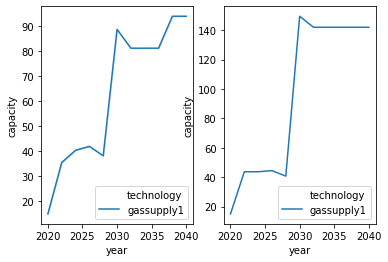

power sector:


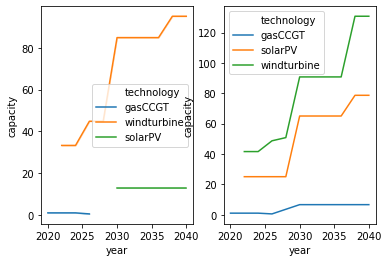

residential sector:


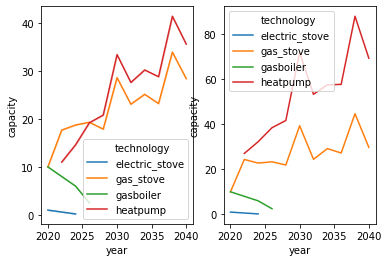

In [12]:
for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    plt.show()
    plt.close()